In [1]:
import os
os.chdir("..")

from utils.callbacks import LearningRateScheduler, LearningRateGetvalue
from utils.optimizers import *
from utils.learning_rate import *
from utils.metrics import MeanIoU
from utils.losses import *
from utils.helpers import *
from utils.data_generator import DatasetGenerator
from utils.utils import *

import configargparse
import matplotlib.pyplot as plt

In [2]:
input_training = r"C:\Users\pso9kor\Datasets\serm\0.SeRM_image\train"
label_training = r"C:\Users\pso9kor\Datasets\serm\0.SeRM_image\trainannot"
max_samples_training = 10000
label_file = r"config\serm_labels.py"
num_classes = 17
image_shape = [384, 384]
augment = True
shuffle = True
batch_size = 4
epochs = 10

In [3]:
# determine absolute filepaths
input_training   = abspath(input_training)
label_training   = abspath(label_training)

# get class names and class colors by parsing the labels py file
_, class_colors = get_labels(parse_convert_py(label_file))
assert num_classes == len(class_colors)

Number of classes -  17
Background - [0, 0, 0]
Slow down - [1, 1, 1]
Go ahead - [2, 2, 2]
Turn right - [3, 3, 3]
Turn left - [4, 4, 4]
Ahead or turn right - [5, 5, 5]
Ahead or turn left - [6, 6, 6]
Crosswalk - [7, 7, 7]
Double line (yellow) - [8, 8, 8]
Double line (blue) - [9, 9, 9]
Broken line (white) - [10, 10, 10]
Single line (yellow) - [11, 11, 11]
Single line (white) - [12, 12, 12]
Stop line - [13, 13, 13]
Numbers - [14, 14, 14]
Texts - [15, 15, 15]
Others - [16, 16, 16]


In [4]:
input_training, label_training

('C:\\Users\\pso9kor\\Datasets\\serm\\0.SeRM_image\\train',
 'C:\\Users\\pso9kor\\Datasets\\serm\\0.SeRM_image\\trainannot')

In [5]:
# build data pipeline
# for training
trainGen = DatasetGenerator(data_path=(input_training, label_training),
                            max_samples=max_samples_training,
                            image_shape=image_shape,
                            augment=augment,
                            class_colors=class_colors,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            epochs=epochs)
dataTrain, len_train, nbatch_train = trainGen()
print("Built data pipeline for {} training samples with {} batches per epoch".format(len_train, nbatch_train))

c:\Users\pso9kor\.conda\envs\tfsdc\lib\site-packages\albumentations\augmentations\transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
c:\Users\pso9kor\.conda\envs\tfsdc\lib\site-packages\albumentations\augmentations\transforms.py:1284: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


Built data pipeline for 2500 training samples with 250 batches per epoch


In [6]:
l=4
plt.figure(figsize=(16,24))
for e, i in enumerate(dataTrain):
    plt.subplot(l, 4, e*4+1)
    plt.imshow(i[0][0])
    plt.subplot(l, 4, e*4+2)
    plt.imshow(decode_one_hot_op(i[1][0], class_colors))
    plt.subplot(l, 4, e*4+3)
    plt.imshow(i[0][1])
    plt.subplot(l, 4, e*4+4)
    plt.imshow(decode_one_hot_op(i[1][1], class_colors))
    if e >= l-1:
        break
print(i[0][0].shape), print(i[1][0].shape)

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes at component 0: expected [?,224,224,3] but got [8,1,224,224,3]. [Op:IteratorGetNext]

<Figure size 1600x2400 with 0 Axes>

(384, 384, 3)
(384, 384, 20)


(None, None)

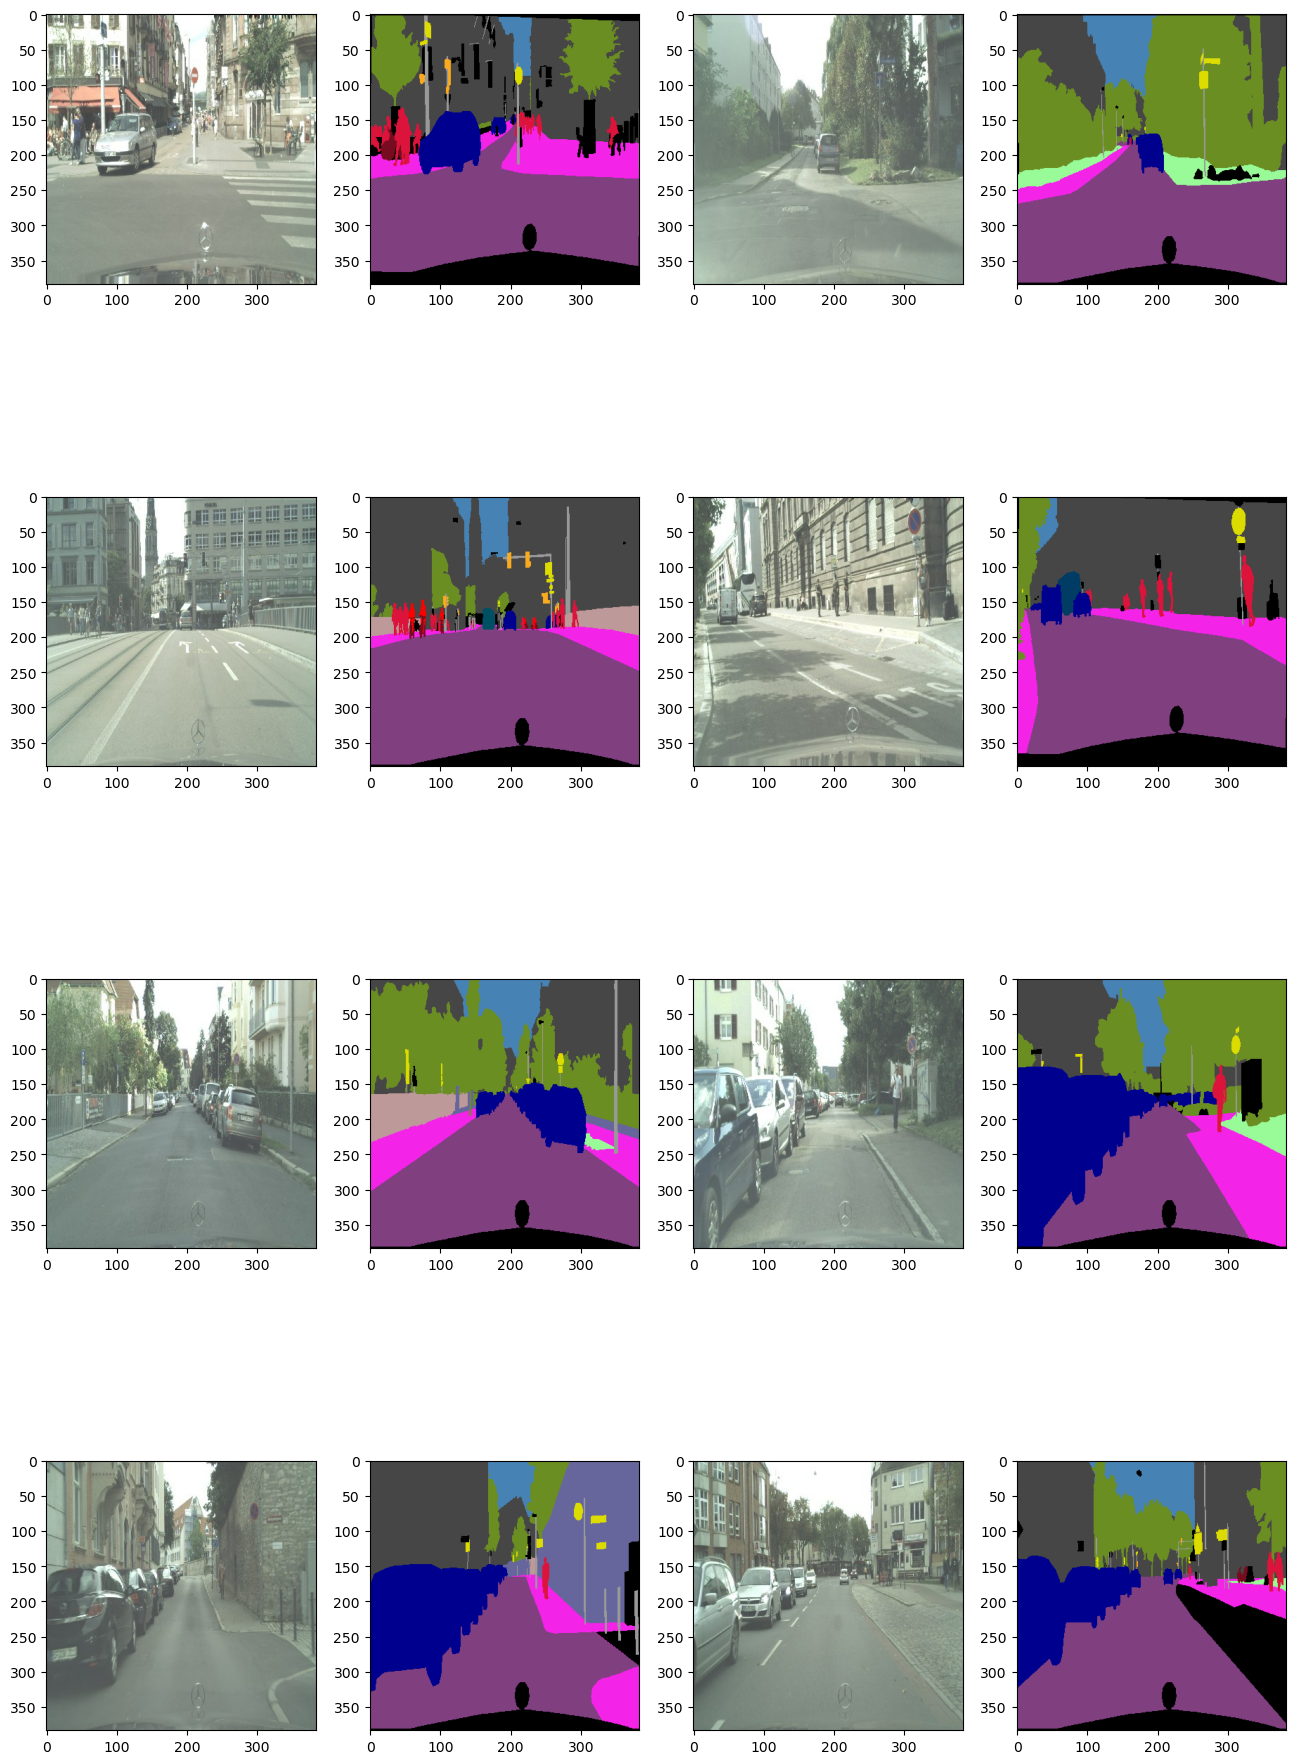

In [5]:
l=4
plt.figure(figsize=(16,24))
for e, i in enumerate(dataTrain):
    plt.subplot(l, 4, e*4+1)
    plt.imshow(i[0][0])
    plt.subplot(l, 4, e*4+2)
    plt.imshow(decode_one_hot_op(i[1][0], class_colors))
    plt.subplot(l, 4, e*4+3)
    plt.imshow(i[0][1])
    plt.subplot(l, 4, e*4+4)
    plt.imshow(decode_one_hot_op(i[1][1], class_colors))
    if e >= l-1:
        break
print(i[0][0].shape), print(i[1][0].shape)